In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

v006.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [38]:
%autoreload
example0 = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/fem_box', 60) # x z
example1 = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', 60) # x y
example2 = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD3', '0006') # x

Loading ../data/BIOQIC/fem_box/60/wave.nc
Loading ../data/BIOQIC/fem_box/60/mre.nc
Loading ../data/BIOQIC/fem_box/60/mre_mask.nc
Loading ../data/BIOQIC/phantom/60/wave.nc
Loading ../data/BIOQIC/phantom/60/mre.nc
Loading ../data/BIOQIC/phantom/60/mre_mask.nc
Loading ../data/NAFLD3/0006/wave.nc
Loading ../data/NAFLD3/0006/mre.nc
Loading ../data/NAFLD3/0006/mre_mask.nc


<IPython.core.display.Javascript object>


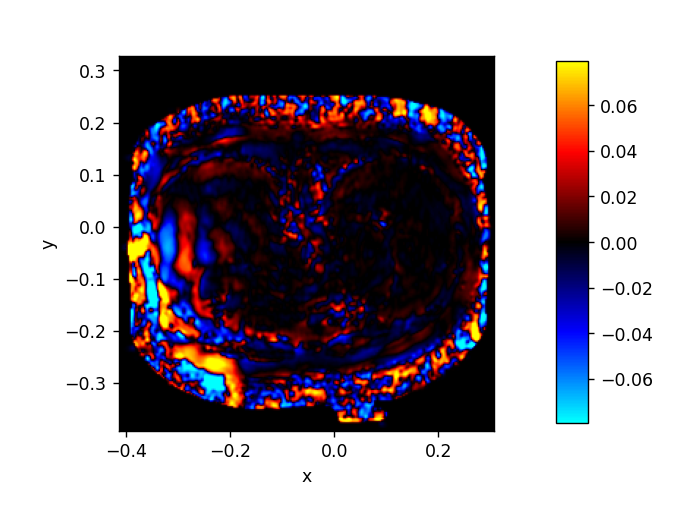

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [39]:
%autoreload
example = example2
example.view('wave', ax_height=3)

Evaluating direct baseline


<IPython.core.display.Javascript object>


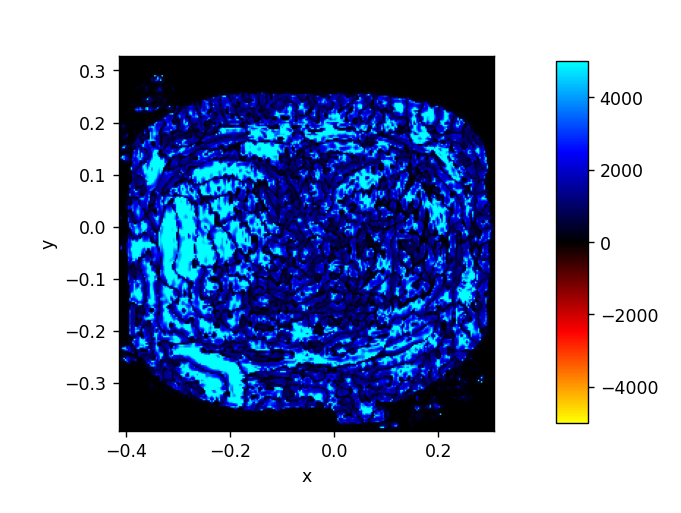

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [41]:
%autoreload
mre_pinn.baseline.eval_direct_baseline(example, frequency=40)
example.view('direct', ax_height=3, polar=True, vmax=5e3)

In [ ]:
%autoreload
mre_pinn.baseline.eval_fem_baseline(example, frequency=40, despeckle=True)
example.view('fem', ax_height=3, polar=True, vmax=5e3)

Evaluating FEM baseline
Solving slice 1/4


In [ ]:
example.view('mre', ax_height=3, polar=True, vmax=5e3)